TODO Items:
    
* 


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('universal_datasets/seeds_dataset.txt', 
                 delim_whitespace=True,
                 names=['area',
                        'perimeter',
                        'compactness',
                        'kernel_length',
                        'kernel_width',
                        'asymmetry',
                        'groove_length',
                        'category',
                       ])
df.loc[::35]      # show rows, from beginning to end, skipping by 35

In [ ]:
X_seed = df.drop(columns=['area', 'perimeter', 'compactness', 'category'])

In [ ]:
y_seed = df['category']

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_seed, y_seed, random_state=1)


In [ ]:
Xtest

In [ ]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3,
                        covariance_type='full',
                        )

In [ ]:
model.fit(Xtrain)

In [ ]:
y_gmm = model.predict(Xtest)
y_gmm

In [ ]:
X_seed.plot.scatter(x='kernel_length', 
                y='kernel_width',
                c='category',
                colormap='viridis',
                )

In [ ]:
Xtest.plot.scatter(x='kernel_length', 
                y='kernel_width',
                c=y_gmm,
                colormap='viridis',
                alpha=0.4)

# Naive Bayes Classification

# NB II

In [ ]:
# https://www.edureka.co/blog/naive-bayes-tutorial/

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
 
dataset = datasets.load_iris()

In [ ]:
type(dataset)

In [ ]:
dataset.DESCR

In [ ]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

In [ ]:
expected = dataset.target

In [ ]:
predicted = model.predict(dataset.data)

In [ ]:
predicted

In [ ]:
expected

In [ ]:
(predicted != expected).sum()

In [ ]:
print(metrics.classification_report(expected, predicted))

# lookup precision
#        recall
#        f1-score
#        support

In [ ]:
metrics.confusion_matrix(expected, predicted)

# virginica, setosa, other
# versus really in virginica, setosa OR other


# NB III

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [ ]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print("Weather:", weather_encoded)

In [ ]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

In [ ]:
#Combining weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
features


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
# Train the model using the training sets
model.fit(features ,label)

In [ ]:
#Predict Output
predicted= model.predict([(0,2),
                          (1,2),
                          (2,1),
                          (3,1)]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

# Support Vector Machine examples
---

## EX 1: vanderplas

STATUS: 0% 

TODO:
* 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

In [ ]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)    

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=10000000000)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='black', alpha=0.2);
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

## Reduced sets of points...

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=10000000000)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {}'.format(N))



In [ ]:
from ipywidgets import interact, fixed

interact(plot_svm, N=[10, 200], ax=fixed(None));

## EX 3: xxx

STATUS: 0% 

TODO:
* 

# Decision Tree/Random Forest examples
---

## EX 1: Decision Tree: Vanderplas

STATUS: 0% 

TODO:
* 

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

In [ ]:
len(y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                zorder=3)   # clim sets color
                                                    #     limit
        
        
    # ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
    #            clim=(y.min(), y.max()), zorder=3)   # clim sets color
                                                    #     limit    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()  # returns a tuple
    ylim = ax.get_ylim()  # ditto
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    # .ravel() returns a flattened array
    # np.c_ stacks columns/arrays side by side...
    # in this case, xx is 200 by 200.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    # count the number of unique values in y (in this case 4)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)
    #contours = ax.contourf(xx, yy, Z, alpha=0.3,
    #                       levels=np.arange(n_classes + 1) - 0.5,
    #                       cmap=cmap, clim=(y.min(), y.max()),
    #                       zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y);

In [ ]:
nx, ny = (4, 3)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(x, y, sep='\n')


xv, yv = np.meshgrid(x, y)
print(xv, yv, sep='\n')

# np.c_[xv.ravel(), yv.ravel()]
xv.ravel()

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=10000000000)
    model.fit(X, y)
    
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plt.set_xlim(-1, 4)
    plt.set_ylim(-1, 6)
    plot_svc_decision_function(model, plt)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
#for axi, N in zip(ax, [60, 120]):
plot_svm(N, ax)


In [ ]:
np.meshgrid(x, y)

In [ ]:
ax = plt.gca()

In [ ]:
ax.get_ylim()

In [ ]:
ax.contourf

In [ ]:
import helpers_05_08

## EX 2: xxx

STATUS: 0% 

TODO:
* 

In [ ]:
%%file helpers_05_08.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=6):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 2, 3, 4])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

# LINREG:
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x from 0 to 30
# x = 30 * np.random.random((25, 1))

# y = a*x + b with noise
# y = 0.3 * x + 2.0 + np.random.normal(size=x.shape)

df = pd.read_csv('universal_datasets/linreg_train.csv',
                names=['x', 'y'])

In [ ]:
y

In [ ]:
# create a linear regression model
model = LinearRegression()
model.fit(x, y)

In [ ]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [ ]:
x

In [ ]:
y

## LINREG
---

## Prep the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Prep the training Data

### Prep the test data

In [33]:
dftrain = pd.read_csv('universal_datasets/linreg_train.csv',
                     names=['x', 'y'])

X = np.array(dftrain['x']).reshape(len(dftrain.index), 1)
y = np.array(dftrain['y']).reshape(len(dftrain.index), 1)


## Choose Model

In [15]:
from sklearn.linear_model import LinearRegression

## Choose Hyperparameters

In [16]:
model = LinearRegression()

## Fit the Model

In [34]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Apply the Model

In [41]:
# predict y from the data
X_test = np.linspace(0, 30, 100).reshape(100, 1)

In [42]:
y_test = model.predict(X_test)

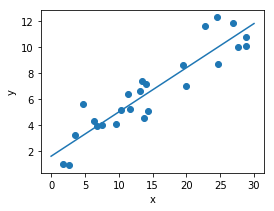

In [48]:
# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(X, y)
ax.plot(X_test, y_test)     # line plot

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.show()

## Examine the results

## XXX
---

## Prep the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Prep the training Data

### Prep the test data

## Choose Model

## Choose Hyperparameters

## Fit the Model

## Apply the Model

## Examine the results